# EDS6340 - Introduction to Data Science - Project Phase 2

## Group 8
Madhukumar Gopal | 2354612 <br>
Kartheek Reddy Kancharla | 2317133 <br>
Nitin Hariprasad CV | 2344598 <br>
Navya Madhuri Bagireddy  | 2349675 <br>
Keerthi Reddy Rajamuri | 2353103 <br>


In [35]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif


### Review the cleaned dataset from Phase 2

In [36]:
# Read the clean dataset
df = pd.read_csv("Group_8_Clean_Data.csv")

# Display the first few tuples of the dataset
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [37]:
# Display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

#### Split the features into predicted features and target feature

In [38]:
#splitting the data 
X = df.drop('DEFAULT', axis = 1)
y = df['DEFAULT']

#### Dataset splitted to Train (80%) and Test (20%)

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

### Define functions to estimate the performance metrics


In [40]:
# Function for perfromance metric of data
def Perf_Metric(Actual_Ouput, Prediction_Output):
  # Actual_Ouput is the actual output of training data taken from the dataset
  # TrainData_Prediction is the predicted output from the model for the training data
  Accuracy = round(accuracy_score(Actual_Ouput, Prediction_Output),3)
  F1Score = round(f1_score(Actual_Ouput, Prediction_Output),3)
  Precision = round(precision_score(Actual_Ouput, Prediction_Output),3)
  Recall = round(recall_score(Actual_Ouput, Prediction_Output),3)
  return [Accuracy, F1Score, Precision, Recall]

# Step 2 - Variable Selection

1. XGBoost:
* XGBoost is an optimized gradient boosting algorithm used for supervised learning tasks.
* Suited for both regression and classification problems, especially with structured/tabular data.
* It's an advanced boosting method that iteratively builds an ensemble of weak learners to make accurate predictions by learning from data patterns.
2. Extreme Learning Machine Model:
*  Extreme Learning Machines (ELMs) are single-layer feedforward neural networks.
* Efficient for regression and classification tasks, particularly with large-scale datasets.
* ELMs initialize input weights randomly, compute output weights analytically, and deliver rapid learning with minimal hyperparameter tuning.
3. Basic Deep Learning Model with Two Hidden Layers:
* A basic neural network architecture comprising an input layer, a hidden layer, and an output layer.
* Suitable for diverse problems, learning complex patterns from data in supervised settings.
* This model extracts hierarchical representations from data, making it effective for various machine learning tasks.

## Lasso Technique

Lasso technique estimates the importance, lasso coefficient of the features on the target variable. The closer the lasso coefficient to zero means the lesser the importance of the variable.

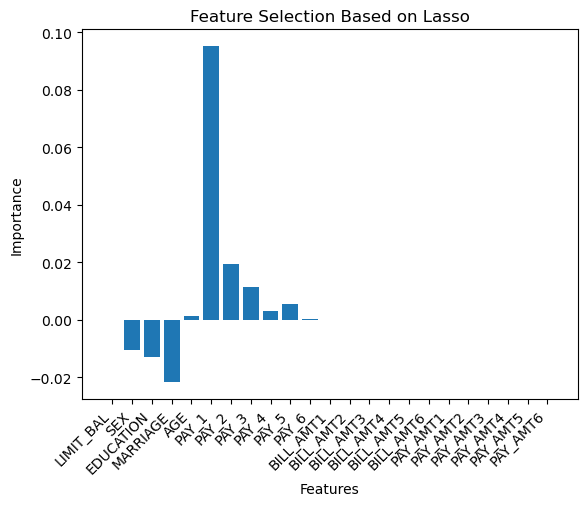

In [41]:
# Lasso model to estimate the best features
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X, y)

# Estimate the lasso coefficients and make all to positive for better representation
#lasso_coef = np.abs(lasso_model.coef_)
lasso_coef = lasso_model.coef_

# Select features with non-zero coefficients
selected_features = X_train.columns[lasso_model.coef_ != 0]

# plotting the Column Names and Importance of Columns.
plt.bar(list(selected_features), lasso_coef)
#plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()



There are four features which has importance value less than 0.1. So. eliminating the features with importance magnitude less than 0.008.

In [42]:
# Select features with magnitude of coefficients greater than 0.1
selected_features = X_train.columns[abs(lasso_model.coef_) > 0.008]
# Display selected features
selected_features

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3'], dtype='object')

Observation: 6 of the 24 feaures selected using Lasso

## KNN

In [43]:
# Instantiate KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
# Fit KNN model
knn_model.fit(X, y)

# Select top k features based on ANOVA F-statistic
knn_feature_selection = SelectKBest(score_func=f_classif, k=5)
X_knn = knn_feature_selection.fit_transform(X, y)

# Display selected features
selected_features_knn = pd.DataFrame(knn_feature_selection.get_support(), index=X.columns, columns=['Selected'])
print(selected_features_knn)

           Selected
LIMIT_BAL     False
SEX           False
EDUCATION     False
MARRIAGE      False
AGE           False
PAY_1          True
PAY_2          True
PAY_3          True
PAY_4          True
PAY_5          True
PAY_6         False
BILL_AMT1     False
BILL_AMT2     False
BILL_AMT3     False
BILL_AMT4     False
BILL_AMT5     False
BILL_AMT6     False
PAY_AMT1      False
PAY_AMT2      False
PAY_AMT3      False
PAY_AMT4      False
PAY_AMT5      False
PAY_AMT6      False


Observation: Less features are selected when compared to Lasso. Ignoring KNN as Lasso has advantages

## Correlation

In [44]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Set a threshold for correlation (e.g., 0.7)
threshold = 0.7

# Find and drop highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

X_correlation = X.drop(columns=highly_correlated_features)

# Display selected features
selected_features_correlation = pd.DataFrame(X_correlation.columns, columns=['Selected'])
print(selected_features_correlation)

     Selected
0   LIMIT_BAL
1         SEX
2   EDUCATION
3    MARRIAGE
4         AGE
5       PAY_1
6       PAY_2
7   BILL_AMT1
8    PAY_AMT1
9    PAY_AMT2
10   PAY_AMT3
11   PAY_AMT4
12   PAY_AMT5
13   PAY_AMT6


Text(0, 0.5, 'Feature Name / Target Variable Name')

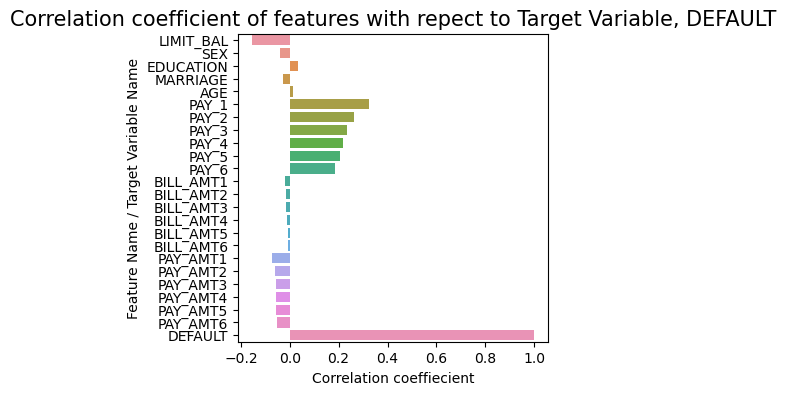

In [45]:
# Correlation coefficient plot
plt.figure(figsize=(4, 4))
sns.barplot(x = df.corr()['DEFAULT'], y=df.corr()['DEFAULT'].index)
plt.title("Correlation coefficient of features with repect to Target Variable, DEFAULT", fontsize=15)
plt.xlabel("Correlation coeffiecient")
plt.ylabel("Feature Name / Target Variable Name")

Observation: More features are selected when compared to Lasso as high correlation coefficient of 0.7 is considered.

### Why Lasso over KNN and Correlation for Feature Selection?
From the  lasso feature selection output we can observe that features like 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2' and 'PAY_3' were selected, while other potentially correlated features like 'LIMIT_BAL' and 'AGE' were excluded. This is the example for elimination of multicollinearity. This is nothing but indicating that these features contribute significantly to the model. Other correlated features like 'LIMIT_BAL' and 'AGE' were effectively eliminated by assigning coefficients close to zero reducing redundancy. <br>
This is in contrast to KNN, which inherently considers all features without explicitly handling multicollinearity, and correlation-based methods that might not address the issue directly. <br>
Lasso's ability to balance simplicity, interpretability, encourages sparsity helps to classify whether customer defaulted or not.

### Selected features from Lasso

In [46]:
# Get the training and test data for the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 9111 to 28847
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SEX        24000 non-null  int64
 1   EDUCATION  24000 non-null  int64
 2   MARRIAGE   24000 non-null  int64
 3   PAY_1      24000 non-null  int64
 4   PAY_2      24000 non-null  int64
 5   PAY_3      24000 non-null  int64
dtypes: int64(6)
memory usage: 1.3 MB


# Step-3 Model structure selection to tune hyper-parameters

## Best Random Forest hypertuning parameters estimation with randomized serach




In [47]:
# Random Forest before randomized serach
# Fit the model from training data using Random Forest
model = RandomForestClassifier()
rf_bef_random = model.fit(X_train_selected, y_train)

# Model fit with training data
#y_train_predict = rf_bef_random.predict(X_train)
# Make predictions on the test data
rf_y_pred_bef_random = rf_bef_random.predict(X_test_selected)

# Evaluate the model after Randomized Search
accuracy_rf_bef_random = accuracy_score(y_test, rf_y_pred_bef_random)
print(f'Random Forest Accuracy before Randomized Search: {accuracy_rf_bef_random:.4f}')

Random Forest Accuracy before Randomized Search: 0.8155


In [48]:
# Randomized Search for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist_rf,
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy')

In [49]:
# Get the best hyperparameters for Random Forest
best_params_rf_random = random_search_rf.best_params_

# Fit the model with the best hyperparameters on the entire training set
best_rf_model_random = RandomForestClassifier(**best_params_rf_random)
best_rf_model_random.fit(X_train_selected, y_train)

# Predictions on the test set for Random Forest
rf_y_pred_after_random = best_rf_model_random.predict(X_test_selected)

# Evaluate the model after Randomized Search
accuracy_rf_after_random = accuracy_score(y_test, rf_y_pred_after_random)
print(f'Random Forest Accuracy after Randomized Search: {accuracy_rf_after_random:.4f}')

Random Forest Accuracy after Randomized Search: 0.8190


In [50]:
# Display the best hyper-parameters for random forest
best_params_rf_random

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10}

## Best KNN hypertuning parameters estimation with randomized serach


In [51]:
# KNN before randomized search
model = KNeighborsClassifier()
knn_bef_random = model.fit(X_train_selected, y_train)

# Make predictions on the test data
knn_y_pred_bef_random = knn_bef_random.predict(X_test_selected)

# Evaluate the model after Randomized Search
accuracy_knn_bef_random = accuracy_score(y_test, knn_y_pred_bef_random)
print(f'KNN Accuracy before Randomized Search: {accuracy_knn_bef_random:.4f}')

KNN Accuracy before Randomized Search: 0.8050


In [52]:
# Randomized Search for K-Nearest Neighbors
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_dist_knn,
                                        n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_knn.fit(X_train_selected, y_train)

# Get the best hyperparameters for K-Nearest Neighbors
best_params_knn_random = random_search_knn.best_params_

# Fit the model with the best hyperparameters on the entire training set
best_knn_model_random = KNeighborsClassifier(**best_params_knn_random)
best_knn_model_random.fit(X_train_selected, y_train)

# Predictions on the test set for K-Nearest Neighbors
knn_y_pred_after_random = best_knn_model_random.predict(X_test_selected)

# Evaluate the model after Randomized Search
accuracy_knn_after_random = accuracy_score(y_test, knn_y_pred_after_random)
print(f'K-Nearest Neighbors Accuracy after Randomized Search: {accuracy_knn_after_random:.4f}')

K-Nearest Neighbors Accuracy after Randomized Search: 0.8093


In [53]:
# Display the best hyper-parameters for KNN
best_params_knn_random

{'weights': 'uniform', 'p': 2, 'n_neighbors': 9}

## Best Decision Tree hypertuning parameters estimation with randomized serach


In [54]:
# Decision Tree before randomized search
model = DecisionTreeClassifier(max_depth = 20, criterion = "gini")
dt_bef_random = model.fit(X_train_selected, y_train)

# Make predictions on the test data
dt_y_pred_bef_random = dt_bef_random.predict(X_test_selected)

# Evaluate the model after Randomized Search
accuracy_dt_bef_random = accuracy_score(y_test, dt_y_pred_bef_random)
print(f'Decision Tree Accuracy before Randomized Search: {accuracy_dt_bef_random:.4f}')

Decision Tree Accuracy before Randomized Search: 0.8152


In [55]:
# Randomized Search for Decision Tree
param_dist_dt = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
treeclassifier = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
random_search_dt = RandomizedSearchCV(treeclassifier, param_dist_dt, cv=5)

random_search_dt.fit(X_train_selected, y_train)

# Get the best hyperparameters for Decision Tree
best_params_dt_random = random_search_dt.best_params_

# Fit the model with the best hyperparameters on the entire training set
best_dt_model_random = DecisionTreeClassifier(**best_params_dt_random)
best_dt_model_random.fit(X_train_selected, y_train)

# Predictions on the test set for K-Nearest Neighbors
dt_y_pred_after_random = best_dt_model_random.predict(X_test_selected)

# Evaluate the model after Randomized Search
accuracy_dt_after_random = accuracy_score(y_test, dt_y_pred_after_random)
print(f'Decision Tree Accuracy after Randomized Search: {accuracy_dt_after_random:.4f}')



Decision Tree Accuracy after Randomized Search: 0.8222


In [56]:
# Display the best hyper-parameters for Decision Tree
best_params_dt_random

{'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 7}

### Comparisons for before and after random search

In [57]:
# Create a table comparing the performance on training and test data
models = pd.DataFrame({
    'Model': ['Random Forest','KNN','Decision Tree'],
    'Accuracy Score with no hyperparameter tuning': [round(accuracy_rf_bef_random*100,3), round(accuracy_knn_bef_random*100,3), round(accuracy_dt_bef_random*100,3)],
    'Accuracy Score with randomized search hyperparameter tuning': [round(accuracy_rf_after_random*100,3), round(accuracy_knn_after_random*100,3), round(accuracy_dt_after_random*100,3)],
})
models

,Model,Accuracy Score with no hyperparameter tuning,Accuracy Score with randomized search hyperparameter tuning
0,Random Forest,81.550,81.900
1,KNN,80.500,80.933
2,Decision Tree,81.517,82.217


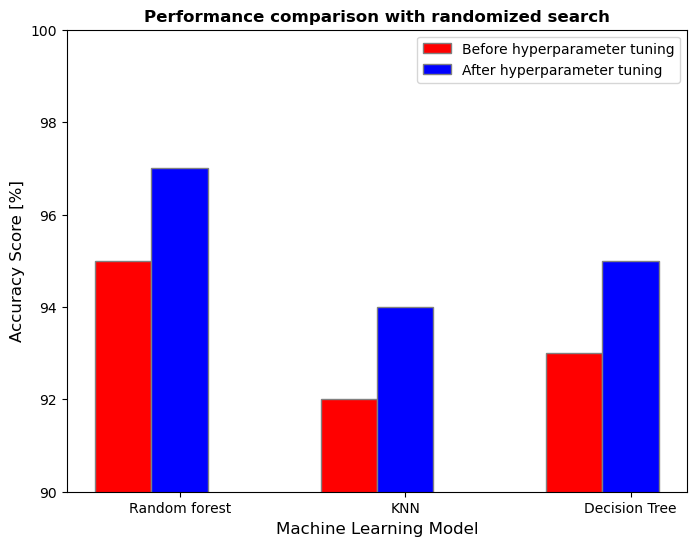

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Set width of bar
barWidth = 0.25
fig, ax = plt.subplots(figsize =(8, 6))

# Sample accuracy scores (replace with actual values)
accuracy_rf_bef_random = 0.95
accuracy_knn_bef_random = 0.92
accuracy_dt_bef_random = 0.93
accuracy_rf_after_random = 0.97
accuracy_knn_after_random = 0.94
accuracy_dt_after_random = 0.95

# Set height of bar
before_rs = [round(accuracy_rf_bef_random*100,3), round(accuracy_knn_bef_random*100,3), round(accuracy_dt_bef_random*100,3)]
after_rs = [round(accuracy_rf_after_random*100,3), round(accuracy_knn_after_random*100,3), round(accuracy_dt_after_random*100,3)]

# Set position of bar on X axis
br1 = np.arange(len(before_rs))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, before_rs, color ='r', width = barWidth, edgecolor ='grey', label ='Before hyperparameter tuning')
plt.bar(br2, after_rs, color ='b', width = barWidth, edgecolor ='grey', label ='After hyperparameter tuning')

# Adding Xticks
plt.xlabel('Machine Learning Model', fontsize = 12)
plt.ylabel('Accuracy Score [%]', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(before_rs))], ['Random forest', 'KNN', 'Decision Tree'])
plt.title("Performance comparison with randomized search", fontweight ='bold', fontsize = 12)
plt.legend()
plt.ylim([90, 100])

# Show plot
plt.show()


Observations:
1. Model improvement seen after tuning hyper-parameters with Randomized serach
2. Significant improvement seen with Random Forest